# Ising Model (incl. Monte Carlo & SW-algorithm)

## Simulation setup

In [1]:
%matplotlib inline
import time as tm
from types import SimpleNamespace
from Ising_simulation import *

# Simulation initialisation
sim = SimpleNamespace(MC_steps = 100,      # Number of monte carlo steps
                      eq_data_points = 90, # Number of equilibrium data points in MC steps
                      L = 20,              # Grid size in 1 dimension
                      T = 3.5,             # Initial temperature
                      T_steps = 20,        # Number of temperature steps
                      dT = -0.1,           # Temperature increment
                      T_c = 2.2727,        # Critical Temperature
                      h = 0,               # Initial magnetic field
                      dh = 0,              # Magnetic increment
                      J = 1,               # Coupling J (Keep at 1)
                      kb = 1,              # Boltzman constant (Keep at 1)
                      spin_init = 'up',    # Initial spin grid (up, down or random)
                      algorithm = 'SW',    # SW (Swendesen Wang) or SF (Spin Flip)
                      cor_cal = True,
                      bs_trials = 1000
                      )

sim.spin_site_total_number = sim.L**2       # Total number of spin sites
sim.MCS = sim.L**2                          # Montecarlo step size
sim.time_steps = sim.MCS * sim.MC_steps     # Montecarlo time to regular time steps

# Simulation results
results = IM_sim(sim)


## Data processing

In [2]:
from importlib import reload
import data_processing
reload(data_processing)
from data_processing import *

identifier = '0503'
data_dir = './exported_data/'        # Directory where data should be stored 
fig_dir = './exported_figs/'         # Directory where figures should be saved
save_fig = True                      # Should figure be saved?

save_data(sim, results, data_dir, identifier)
plot_func(sim, results, fig_dir, identifier, save_fig)
visualize_islands(sim, results, fig_dir, identifier, save_fig)
grid_plot(sim, results, fig_dir, identifier, save_fig)

Data is saved to: ./exported_data/
Figures are saved to: ./exported_figs/


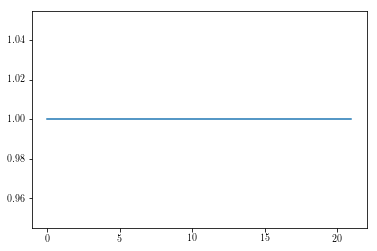

In [5]:
### Wip, plot of last correlation
data = results.cor_fun_chi
length = len(data)
plt.plot(range(length), data)
plt.show()
